In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#loading image
img= Image.open("/content/favicon-96x96.png")
np_image = np.array(img)
print(np_image.shape)

(96, 96, 4)


In [ ]:
channels= np_image.shape[2]

In [ ]:
kernel = np.random.random((5,5,channels))-0.5

In [ ]:
def image_with_channels(kernel):
    fig,ax =plt.subplots(1,4,figsize=(8,6))
    ax[0].imshow(kernel[:,:,0])
    ax[1].imshow(kernel[:,:,1])
    ax[2].imshow(kernel[:,:,2])
    ax[3].imshow(kernel[:,:,3])

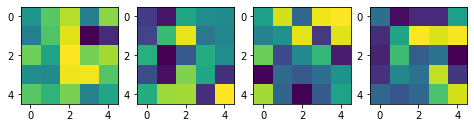

In [ ]:
image_with_channels(kernel)

In [ ]:
def relu(x):
  return(np.maximum(0, x))
def sigmoid(x):
  return(1/(1 + np.exp(-1*x)))
def tanh(x):
  return(np.tanh(x))
def prelu(x):
  return(np.maximun(0,x) + 0.01 * np.minimum(0,x))

In [ ]:
def multiply(a,b):
  sa = a.shape[0]
  sb = b.shape[0]
  c = np.empty(shape=(sb,sb))
  for i in range(sb):
    for j in range(sb):
      c[i][j] = a[i][j]*b[i][j]
  sum_c = np.sum(c)
  return sum_c

In [ ]:
def convolution(np_img,stride,padding,kernel,nonlinearity):

  # dimensions of input
  W = np_img.shape[1]

  # channels in the image
  C = np_img.shape[2]

  # for padding
  zeros = np.zeros((padding,W,C))

  # image after padding
  img = np.vstack((zeros,np_img,zeros))

  # dimensions of the kernel
  # w = np.empty(shape = (2))
  w0 = int(kernel.shape[0])
  w1 = int(kernel.shape[1])

  # dimensions of the output note that image.shage[0] already includes padding
  o1 = int((img.shape[0] - w0)/stride + 1)
  o2 = int((img.shape[1]- w1)/stride + 1)

  ## after adding channels in the image
  # cimg = np.sum(img,axis = 2)

  output = np.empty(shape=(o1,o2,C))

  for k in range(C):
    for i in range(o1):
      for j in range(o2):
        output[i][j][k] =  multiply(img[stride*i:stride*i+w0,stride*j:stride*j+w1,k], kernel[:,:,k])

  output = np.sum(output, axis = 2)
  outputmax, outputmin = output.max(), output.min()
  output = (output - outputmin)/(outputmax - outputmin)

  # we get the output after convolving and apply nonlinearity
  output = nonlinearity(output)

  return output,kernel

In [ ]:
stride = 1
padding = 1

In [ ]:
# conv_output,conv_kernel = convolution(np_image,stride,padding,kernel,relu)
conv_output,conv_kernel = convolution(np_image,stride,padding,kernel,sigmoid)

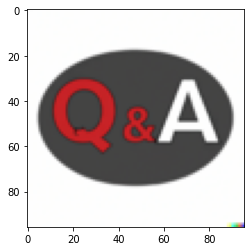

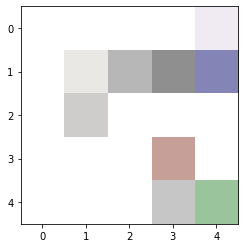

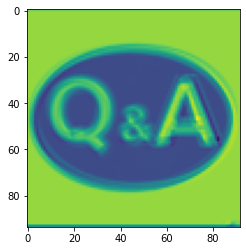

In [ ]:
plt.imshow(np_image)

plt.figure()
plt.imshow(conv_kernel)

plt.figure()
plt.imshow(conv_output)

Pooling Function

In [ ]:
def pooling(input,kernelsize,stride,poolingtype):
  output_size_0 = int((input.shape[0] - kernelsize[0])/stride + 1)
  output_size_1 = int((input.shape[1] - kernelsize[1])/stride + 1)
  output = np.empty(shape=(output_size_0,output_size_1))

  if (poolingtype == 'meanpooling'):
    for i in range(output_size_0):
      for j in range(output_size_1):
        output[i][j] = np.mean(input[i*stride:i*stride + kernelsize[0], j*stride: j*stride + kernelsize[1]])


  if (poolingtype == 'maxpooling'):
      for i in range(output_size_0):
        for j in range(output_size_1):
          output[i][j] = np.max(input[i*stride:i*stride + kernelsize[0], j*stride: j*stride + kernelsize[1]])

  if (poolingtype == 'minpooling'):
        for i in range(output_size_0):
          for j in range(output_size_1):
            output[i][j] = np.min(input[i*stride:i*stride + kernelsize[0], j*stride: j*stride + kernelsize[1]])



  return output

In [ ]:
pool_output = pooling(conv_output,[10,10],10,'meanpooling')

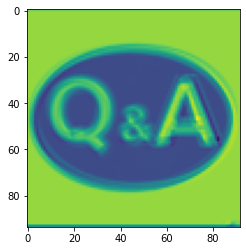

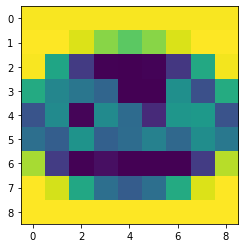

In [ ]:
# To plot figure
plt.imshow(conv_output)
plt.figure()
plt.imshow(pool_output)

Convolution layer function

In [ ]:
def convolution_layer(img,num_filters,kernel_dimensions,stride,padding,nonlinearity):
  channels = img.shape[2]
  w0 = kernel_dimensions[0]
  w1 = kernel_dimensions[1]
  # filters = np.empty(shape = (num_filters,w0,w1,channels))
  o1= int((img.shape[0] + 2*padding - w0)/stride + 1)
  o2= int((img.shape[1] - w1)/stride + 1)
  output = np.empty(shape = (num_filters,o1,o2))
  filters = np.random.random((num_filters,w0,w1,channels))-0.5
  for i in range(num_filters):
    value1,value2 = convolution(img,stride,padding,filters[i],nonlinearity)
    output[i] = value1

  return output,filters

In [ ]:
conv_layer_output,conv_layer_filter = convolution_layer(np_image,4,[5,5],1,1,relu)

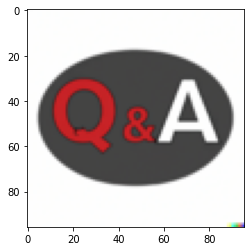

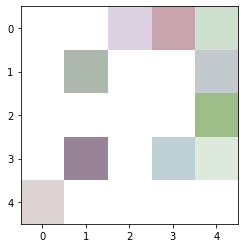

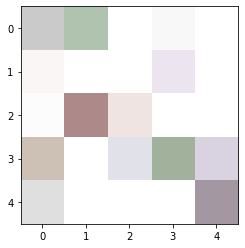

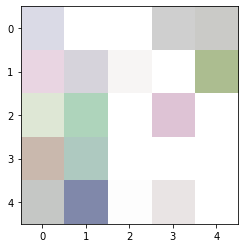

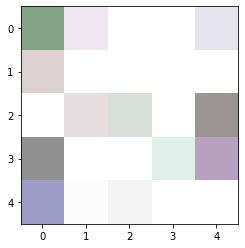

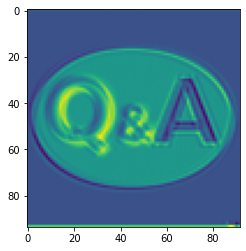

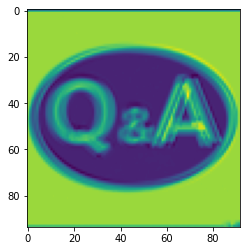

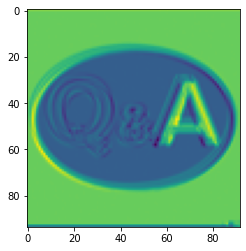

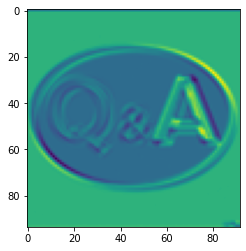

In [ ]:
plt.imshow(np_image)

for i in range(4):
  plt.figure()
  plt.imshow(conv_layer_filter[i,:,::])

for i in range(4):
  plt.figure()
  plt.imshow(conv_layer_output[i])

Here the image is convolved with 4 different kernels to get the outputs

In [ ]:
print((conv_layer_output).shape)

(4, 94, 92)


In [ ]:
def image_with_kernels(kernel):
    fig,ax =plt.subplots(1,4,figsize=(8,6))
    ax[0].imshow(kernel[0,:,:])
    ax[1].imshow(kernel[1,:,:])
    ax[2].imshow(kernel[2,:,:])
    ax[3].imshow(kernel[3,:,:])

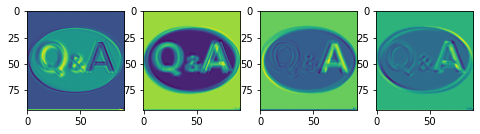

In [ ]:
image_with_kernels(conv_layer_output)

Pooling Layer Function

In [ ]:
def pooling_layer(input,specialcase=None,kernelsize=None,stride=1,poolingtype='meanpooling'):
  if(specialcase == 'GAP') :
    kernelsize = np.array([input.shape[1],input.shape[2]])
    output = np.empty(shape = (input.shape[0],1,1))
    # print(kernelsize)
    for i in range(input.shape[0]):
      output[i] = pooling(input[i],kernelsize,stride,'meanpooling')
      # output = np.reshape(output,[output.shape[0],output.shape[1]])
    return output

  else :
    o1 = int((input.shape[1] - kernelsize[0])/stride + 1)
    o2 = int((input.shape[2] - kernelsize[1])/stride + 1)
    # print(o1)
    # print(o2)
    output = np.empty(shape = (input.shape[0],o1,o2))
    for i in range(input.shape[0]):
      output[i] = pooling(input[i],kernelsize,stride,poolingtype)

    return output

In [ ]:
pool_layer_output = pooling_layer(conv_layer_output,'No',[4,4],2,'meanpooling')

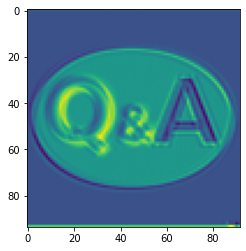

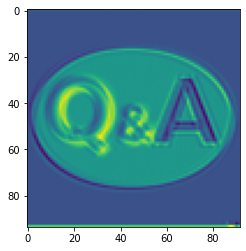

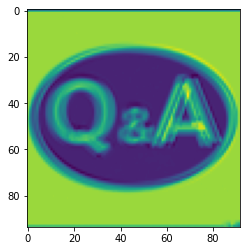

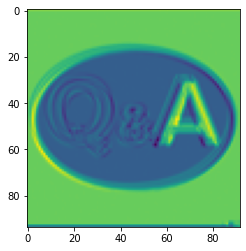

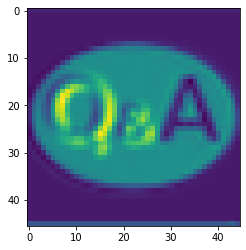

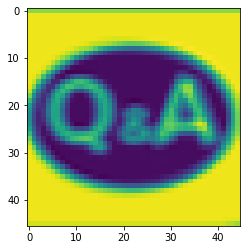

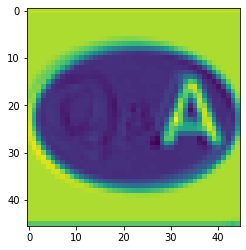

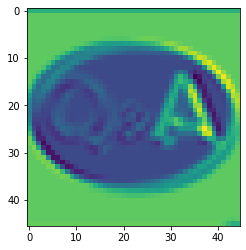

In [ ]:
plt.imshow(conv_layer_output[0])
for i in range(3):
  plt.figure()
  plt.imshow(conv_layer_output[i])
for i in range(4):
  plt.figure()
  plt.imshow(pool_layer_output[i])

Here the 4 outputs have gone through pooling which made them blur

In [ ]:
print(pool_layer_output.shape)

(4, 46, 45)


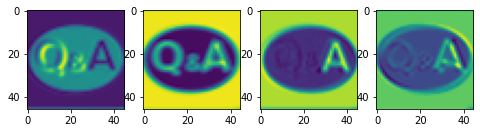

In [ ]:
image_with_kernels(pool_layer_output)

In [ ]:
pool_gap = pooling_layer(conv_layer_output,'GAP')
print(pool_gap.shape)


(4, 1, 1)


Flattening

In [ ]:
def flattening(input,output_size):
  temp_output = (input.reshape(-1,1))
  weights = np.random.random((int(output_size),int(temp_output.shape[0])))
  output = np.matmul(weights,temp_output)
  return output

In [ ]:
flat_output = flattening(conv_layer_output,60)

In [ ]:
print(flat_output.shape)

(60, 1)


Multilayer Perceptron

In [ ]:
def soft_max(output):
    return np.exp(output)/np.sum(np.exp(output))
def multilayer_perceptron(input, num_hidden_layers, size_hidden_layer, nonlinearity, size_output_layer,function=None):
    hidden_layer = np.empty(shape=(num_hidden_layers), dtype=object)

    # initialising hidden layers
    for i in range(num_hidden_layers):
      hidden_layer[i] = np.empty(shape=(size_hidden_layer[i], 1))
      # print(hidden_layer[i])

    # initialising weights
    weights = np.empty(shape = (num_hidden_layers + 1),dtype=object)

    # weights near input layer
    i = 0
    weights[i] = np.random.random((size_hidden_layer[i],input.shape[0]))-0.5

    # weights at hidden layer
    for i in range(num_hidden_layers - 1 ):
      weights[i+1] = np.random.random((size_hidden_layer[i+1], size_hidden_layer[i]))-0.5

    # getting value of first hidden layer
    i = 0
    hidden_layer[0] = np.matmul(weights[0],input)
    hidden_layer[0] = nonlinearity(hidden_layer[0])

    # getting value of hidden layers
    for i in range(num_hidden_layers - 1):
      hidden_layer[i+1] = np.matmul(weights[i+1],hidden_layer[i])
      hidden_layer[i+1] = nonlinearity(hidden_layer[i+1])
      i = i + 1

    # weights at output layer
    weights[i+1] = np.random.random((size_output_layer,size_hidden_layer[i]))-0.5

    # output value
    output = np.matmul(weights[i+1],hidden_layer[i])
    output = nonlinearity(output)
    # print(hidden_layer)

    if(function == 'softmax'):
      output = soft_max(output)

    return output

In [ ]:
org_output = multilayer_perceptron(flat_output,3,[15,12,11],relu,30)

In [ ]:
print(org_output.shape)

(30, 1)


Feed Forward

In [ ]:
def feed_forward(input):
  conv_output_1,conv_filter_1 = convolution_layer(input,16,[3,3],1,0,sigmoid)
  pool_layer_1 = pooling_layer(conv_output_1,'No',[2,2],2,'maxpooling')
  pool_layer_1 = np.transpose(pool_layer_1,(1,2,0))
  conv_output_2,conv_filter_2 = convolution_layer(pool_layer_1,8,[3,3],1,0,sigmoid)
  pool_layer_2 = pooling_layer(conv_output_2,'No',[2,2],2,'maxpooling')
  pool_layer_3 = pooling_layer(pool_layer_2,'GAP')
  flatten_output = flattening(pool_layer_3,10)
  output =  multilayer_perceptron(flatten_output,1,[pool_layer_3.shape[0]], sigmoid,10,'softmax')
  return output

(32, 32, 3)


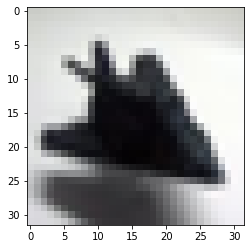

In [ ]:
image = Image.open('/content/fig0.png')
image = np.array(image)
print(image.shape)
plt.imshow(image)

In [ ]:
output = feed_forward(image)

In [ ]:
print(output.shape)

(10, 1)


8a)Feed Forward output for each of 10 classes

In [ ]:
import pickle
def unpickle(file):
    """load the cifar-10 data"""

    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

def parse_record(record):
    depth_major = record.reshape((3,32,32))
    image = np.transpose(depth_major,[0,1,2])
    return image

data_batch_1 = unpickle('/content/data_batch_1')
listIt = [29,30,35,4,5,32,6,13,18,9,17,21,3,10,20,27,40,51,0,19,23,7,11,12,8,8,8,1,2,14]
z = 0
feed_output = np.empty(shape = (30),dtype=object)
for i in listIt:
    name="fig"+str(z)
    image= data_batch_1[b'data'][i]
    image = image.reshape(3,32,32)
    img=np.transpose(image,(1,2,0))
    feed_output[z] = feed_forward(img)
    z+=1

In [ ]:
for i in range(0,30,3):
  print(feed_output[i])

[[0.08889021]
 [0.09463226]
 [0.1075094 ]
 [0.08056728]
 [0.10056891]
 [0.10559939]
 [0.09746267]
 [0.12107417]
 [0.08887094]
 [0.11482477]]
[[0.11355467]
 [0.08885176]
 [0.08337547]
 [0.08920403]
 [0.09560373]
 [0.10977622]
 [0.08821935]
 [0.11424623]
 [0.09966166]
 [0.1175069 ]]
[[0.09060528]
 [0.08465966]
 [0.08312169]
 [0.10682686]
 [0.11583967]
 [0.10631551]
 [0.12906991]
 [0.09841153]
 [0.09002785]
 [0.09512204]]
[[0.09573043]
 [0.11346865]
 [0.09197537]
 [0.09374459]
 [0.10482915]
 [0.10073921]
 [0.09618105]
 [0.10315685]
 [0.09612052]
 [0.10405418]]
[[0.09584409]
 [0.10059467]
 [0.09574872]
 [0.10397085]
 [0.10572527]
 [0.10435588]
 [0.08527517]
 [0.10360971]
 [0.10779477]
 [0.09708086]]
[[0.08795638]
 [0.09302931]
 [0.09600837]
 [0.10325401]
 [0.09575526]
 [0.10375738]
 [0.10468911]
 [0.11421844]
 [0.09453741]
 [0.10679433]]
[[0.09668002]
 [0.1067516 ]
 [0.12837692]
 [0.1510033 ]
 [0.07049197]
 [0.09543384]
 [0.08582025]
 [0.07590188]
 [0.08446268]
 [0.10507753]]
[[0.10353064]

The Outputs are near 0.1 so it is generated from uniform distribution

8b)

In [ ]:
def feed_forward_cpa(input):
  conv_output_1,conv_filter_1 = convolution_layer(input,16,[3,3],1,0,sigmoid)
  pool_layer_1 = pooling_layer(conv_output_1,'No',[2,2],2,'maxpooling')
  pool_layer_1 = np.transpose(pool_layer_1,(1,2,0))
  conv_output_2,conv_filter_2 = convolution_layer(pool_layer_1,8,[3,3],1,0,sigmoid)
  pool_layer_2 = pooling_layer(conv_output_2,'No',[2,2],2,'maxpooling')
  pool_layer_3 = pooling_layer(pool_layer_2,'GAP')
  return pool_layer_3

In [ ]:
import pickle
def unpickle(file):
    """load the cifar-10 data"""

    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

def parse_record(record):
    depth_major = record.reshape((3,32,32))
    image = np.transpose(depth_major,[0,1,2])
    return image

data_batch_1 = unpickle('/content/data_batch_1')
listIt = [29,30,35,4,5,32,6,13,18,9,17,21,3,10,20,27,40,51,0,19,23,7,11,12,8,8,8,1,2,14]
z = 0
feed_output_cpa = np.empty(shape = (30),dtype=object)
for i in listIt:
    name="fig"+str(z)
    image= data_batch_1[b'data'][i]
    image = image.reshape(3,32,32)
    img=np.transpose(image,(1,2,0))
    feed_output_cpa[z] = feed_forward_cpa(img)
    z+=1

In [ ]:
from sklearn.decomposition import PCA
PCA = PCA(n_components = 2)
pca_output = np.empty(shape = (30,8))

for i in range(30):
  pca_output[i] = feed_output_cpa[i].reshape(-1)

pca_output = PCA.fit_transform(pca_output)

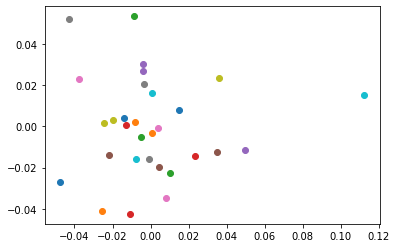

In [ ]:
for i in range(30):
  plt.scatter(pca_output[i][0],pca_output[i][1])

Here each color represent each class and by taking random values for weights we are not getting any discriminability as we can see from above